<a href="https://colab.research.google.com/github/Jadrianp29/testreko/blob/main/SC66_Reto_AguilarPerez_JesusAdrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducción

Actualmente es importante conocer cuáles son las estructuras sociales más propicias para transferir conocimientos y mejorar el desempeño laboral en redes de comunicación. Antes se analizaban redes de comunicación cara a cara, pero hoy en día, con el crecimiento del trabajo desde casa, esta comunicación ha sido sustituida por el correo electrónico.



Hay que tener en cuenta las diferencias en estos dos tipos de redes. En las redes cara a cara, se puede relacionar la interacción entre las personas con una mayor productividad de los trabajadores, mientras que en la comunicación por correo electrónico ocurre lo contrario. En una red de comunicación de correo electrónico que una persona dedique tanto tiempo a escribir correos evita que se enfoque en lo que es su trabajo.



Trabajaremos con la base de datos de la empresa Enron Corporation que fue una empresa energética estadounidense de servicios, que dejó de operar en 2007:

Esta base de datos consta de vínculos entre 143 empleados que enviaron correos electrónicos entre sí dentro del sistema.
El conjunto de datos tiene un total de 623 enlaces de correo electrónico.

Objetivo

El objetivo de este reto es  realizar los siguientes pasos:

Construir una red a partir de una base de datos y lograr una visualización a adecuada de la red.
Análisis de distancias en la red.
Análisis de resiliencia.
Análisis de centralidades.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import chain
import matplotlib.colors as mcolors
import networkx.algorithms.connectivity as nxcon

Construye una red no dirigida a partir de dataframe. Utiliza NetworkX para tener una visualización adecuada de la red, puedes manipular el color y tamaño de nodos y arcos.

In [2]:
Red = pd.read_csv('/content/Redempleados.mtx.txt', sep='\s+', header=None)

In [3]:
Red.head()

0  1
0  17  1
1  72  1
2   3  2
3  19  2
4  20  2

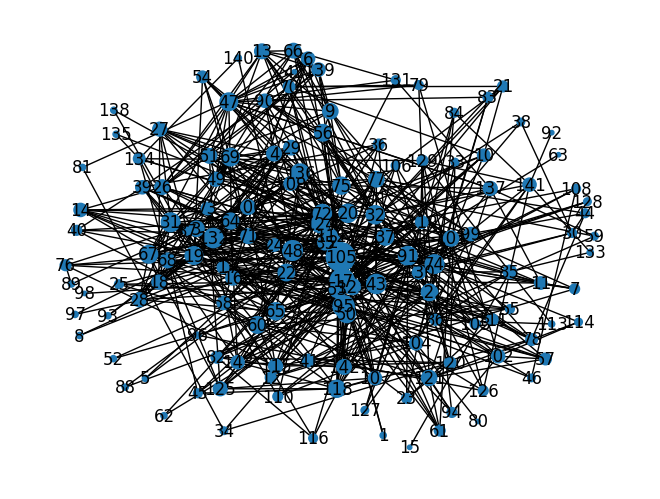

In [4]:
G = nx.from_pandas_edgelist(Red, source=0, target=1)
pos = nx.spring_layout(G, k=1)
degree_dict = dict(G.degree())
sizes = [10 * v for v in degree_dict.values()]
palette = sns.color_palette("bright", len(degree_dict))
nx.draw(G, with_labels=True,pos=pos,node_size=sizes)

plt.show()

In [5]:
max_degree_node = max(G.degree(), key=lambda x: x[1])
print(max_degree_node)

(105, 42)


In [6]:
min_degree_node = min(G.degree(), key=lambda x: x[1])
print(min_degree_node)

(15, 1)


In [7]:
diameter= nx.diameter(G)
print(diameter)

8


In [17]:
shorth_path=nx.average_shortest_path_length(G)
print(shorth_path)

2.967004826159756


Paso 2: Identificación de la red


In [9]:
nx.density(G)

0.061361174037230376

In [10]:
nx.average_node_connectivity(G)

4.951344430217669

In [11]:
articulation_points = list(nx.articulation_points(G))
print(articulation_points)

[81, 34, 112, 85, 130, 141, 53]


In [12]:
edges_to_remove = [(u, v) for u, v in G.edges() if u in articulation_points or v in articulation_points]
edges_to_remove

[(64, 53),
 (105, 53),
 (112, 8),
 (112, 51),
 (112, 62),
 (112, 80),
 (112, 88),
 (112, 94),
 (112, 95),
 (112, 108),
 (112, 124),
 (51, 130),
 (10, 53),
 (53, 35),
 (53, 43),
 (53, 50),
 (53, 57),
 (53, 63),
 (53, 77),
 (53, 118),
 (53, 119),
 (53, 123),
 (53, 125),
 (53, 142),
 (32, 141),
 (85, 15),
 (85, 86),
 (85, 113),
 (85, 126),
 (85, 129),
 (85, 130),
 (85, 133),
 (85, 134),
 (85, 141),
 (126, 130),
 (33, 34),
 (120, 34),
 (141, 84),
 (141, 86),
 (141, 92),
 (141, 127),
 (141, 129),
 (141, 130),
 (141, 133),
 (34, 81),
 (81, 42),
 (130, 84),
 (130, 86),
 (130, 98),
 (130, 127),
 (130, 129)]

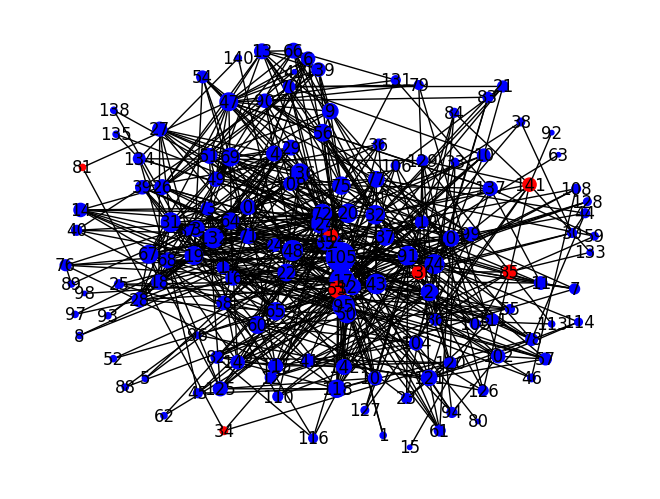

In [13]:
Colors=['red' if node in articulation_points else 'blue' for node in G.nodes()]
nx.draw(G, with_labels=True,pos=pos,node_color=Colors,node_size=sizes)


Paso 3: Calcula y visualiza las centralidades de la red


In [14]:
#Cen= Color diferente para el Top 10 por cada centralidad ejemplo: bet_cen10)
def draw_net(G, pos, measures, measure_name,cen):

    plt.figure(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250,node_color=cen)

    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)

    plt.title(measure_name)
    plt.axis('off')
    plt.show()

In [19]:
betweenness = nx.betweenness_centrality(G)
bet_cen = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
bet_cen_1 = [node for node, _ in bet_cen[:10]]
bet_cen_10 = ['red' if node in bet_cen_1 else 'lightblue' for node in G.nodes()]
bet_cen[0:10]

[(105, 0.19400604344556296),
 (17, 0.11088210445609471),
 (48, 0.09673142009207425),
 (91, 0.09118959870866389),
 (32, 0.08554735598477585),
 (95, 0.07579595400584722),
 (141, 0.06345441275176905),
 (22, 0.05846852533268458),
 (72, 0.05833907970763193),
 (51, 0.05199434696409222)]

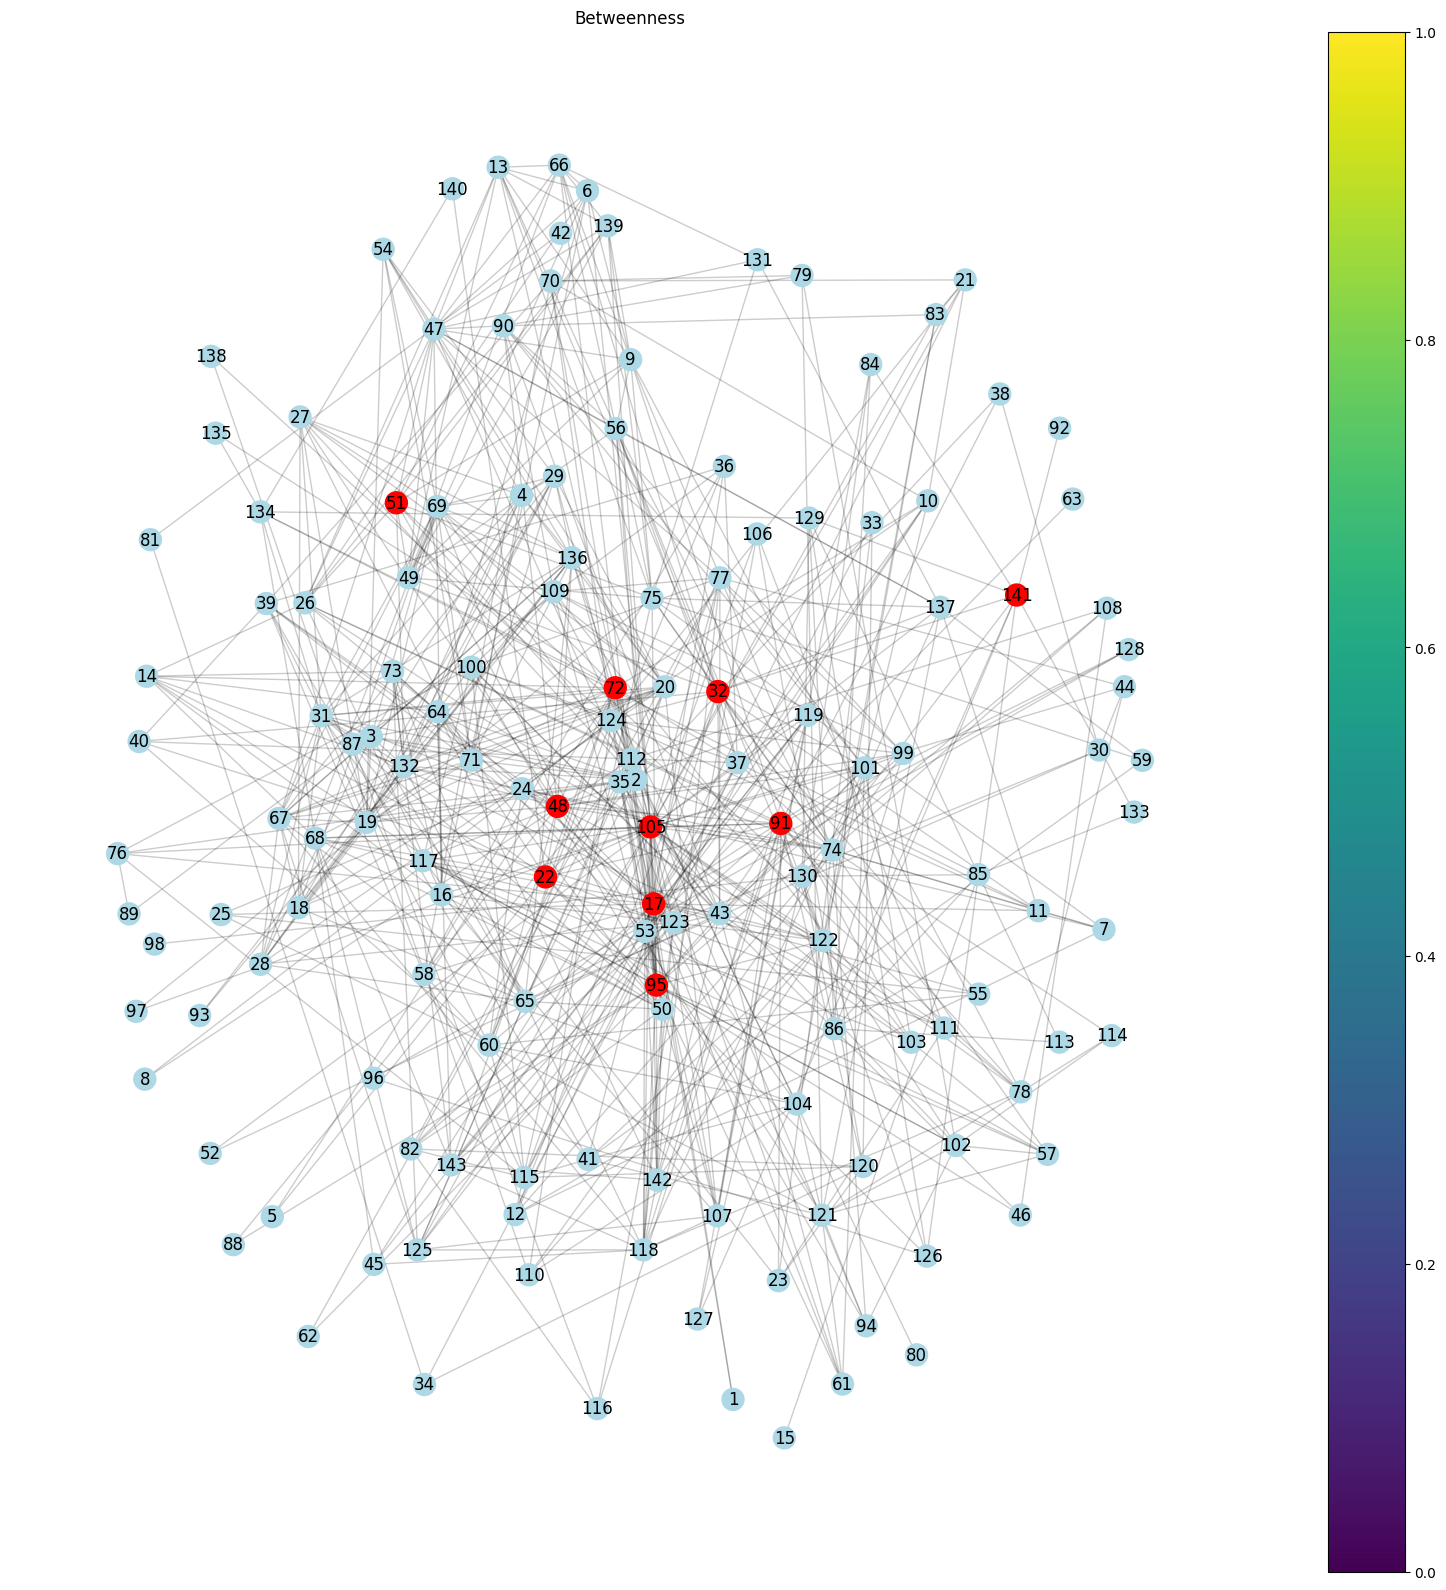

In [20]:
draw_net(G, pos, nx.betweenness_centrality(G), 'Betweenness',bet_cen_10)

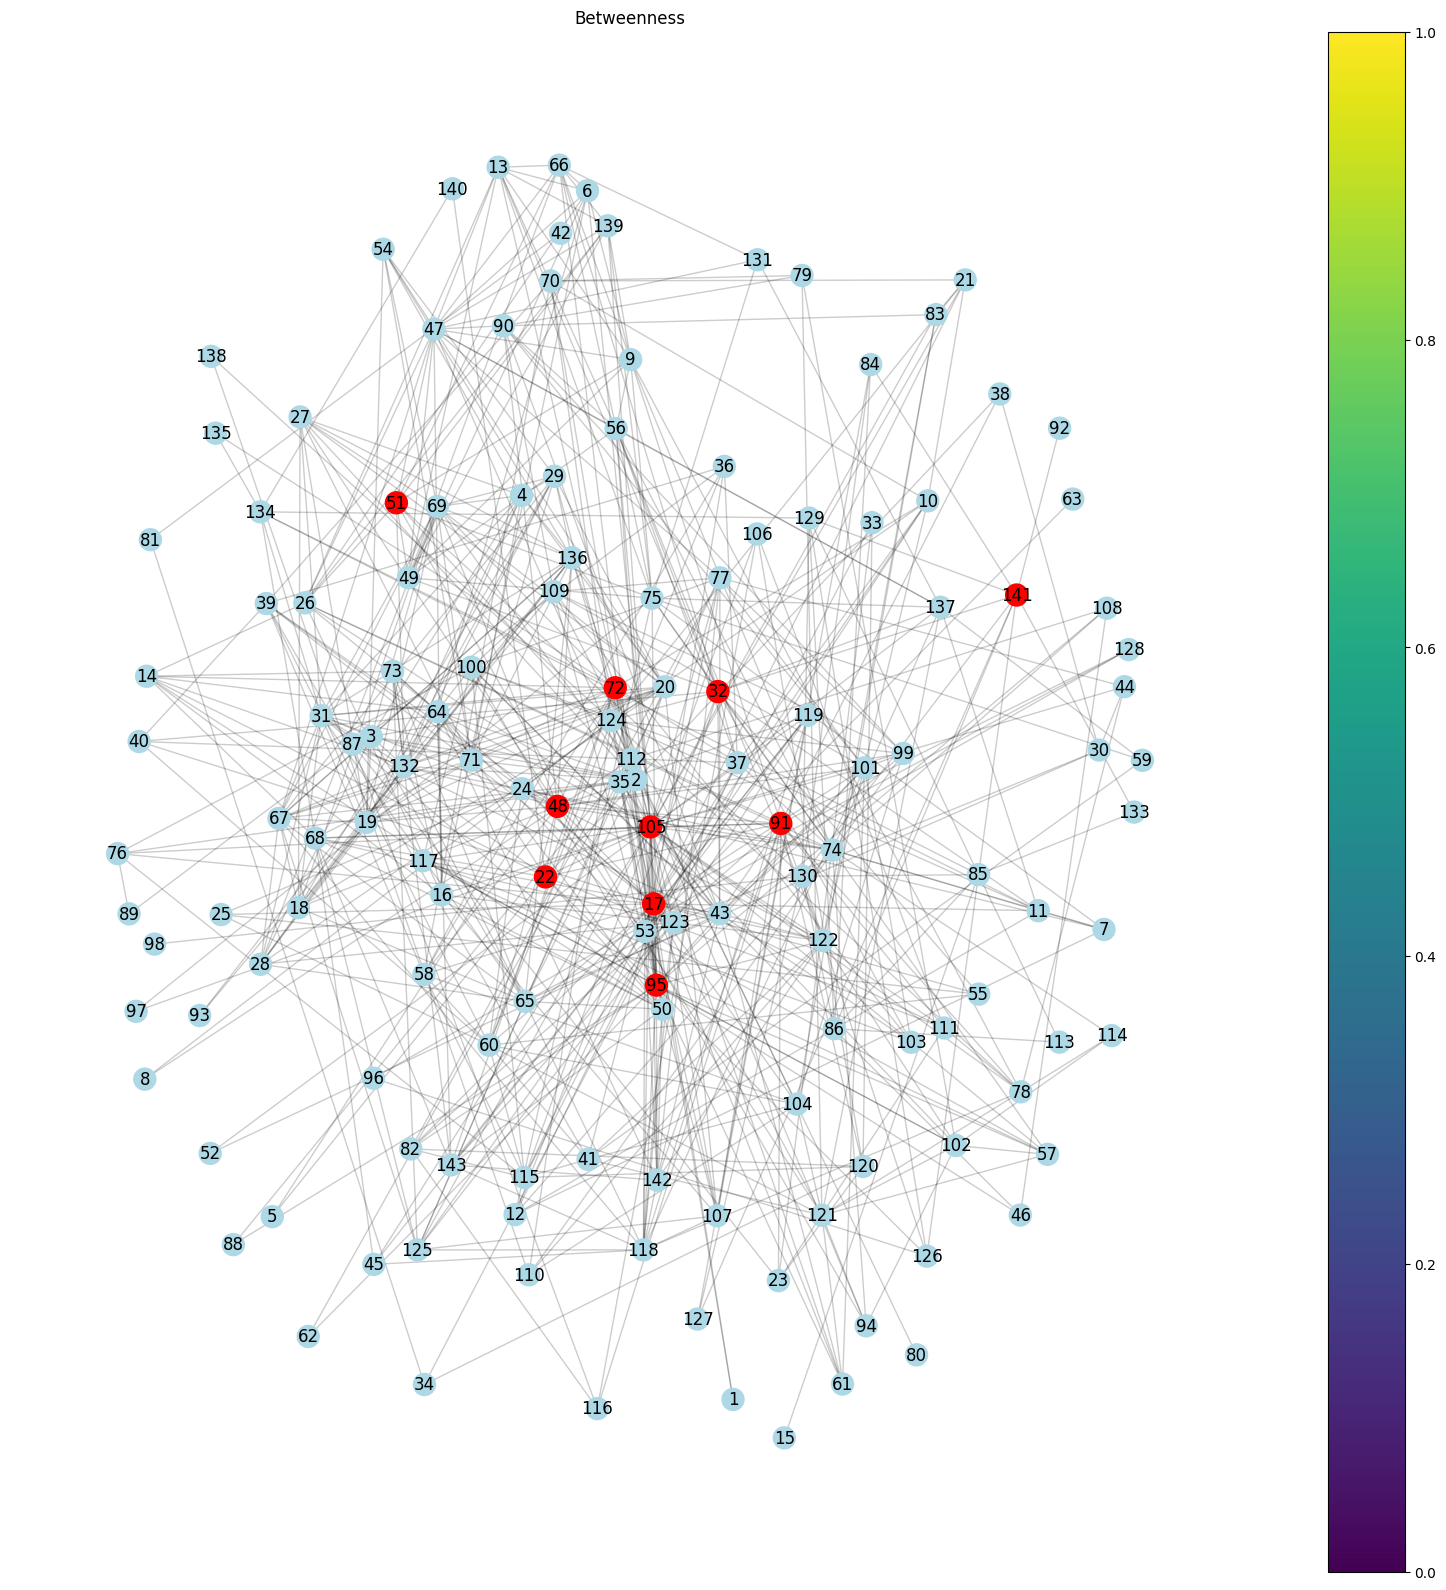

In [21]:
draw_net(G, pos, nx.betweenness_centrality(G), 'Betweenness',bet_cen_10)

In [24]:
closeness = nx.closeness_centrality(G)
close_cen = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
close_cen_1 = [node for node, _ in close_cen[:10]]
close_cen_10 = ['red' if node in close_cen_1 else 'lightblue' for node in G.nodes()]
close_cen[0:10]

[(105, 0.5),
 (17, 0.47019867549668876),
 (95, 0.4382716049382716),
 (74, 0.4369230769230769),
 (37, 0.4369230769230769),
 (48, 0.43558282208588955),
 (91, 0.43425076452599387),
 (43, 0.4316109422492401),
 (72, 0.42900302114803623),
 (22, 0.4251497005988024)]

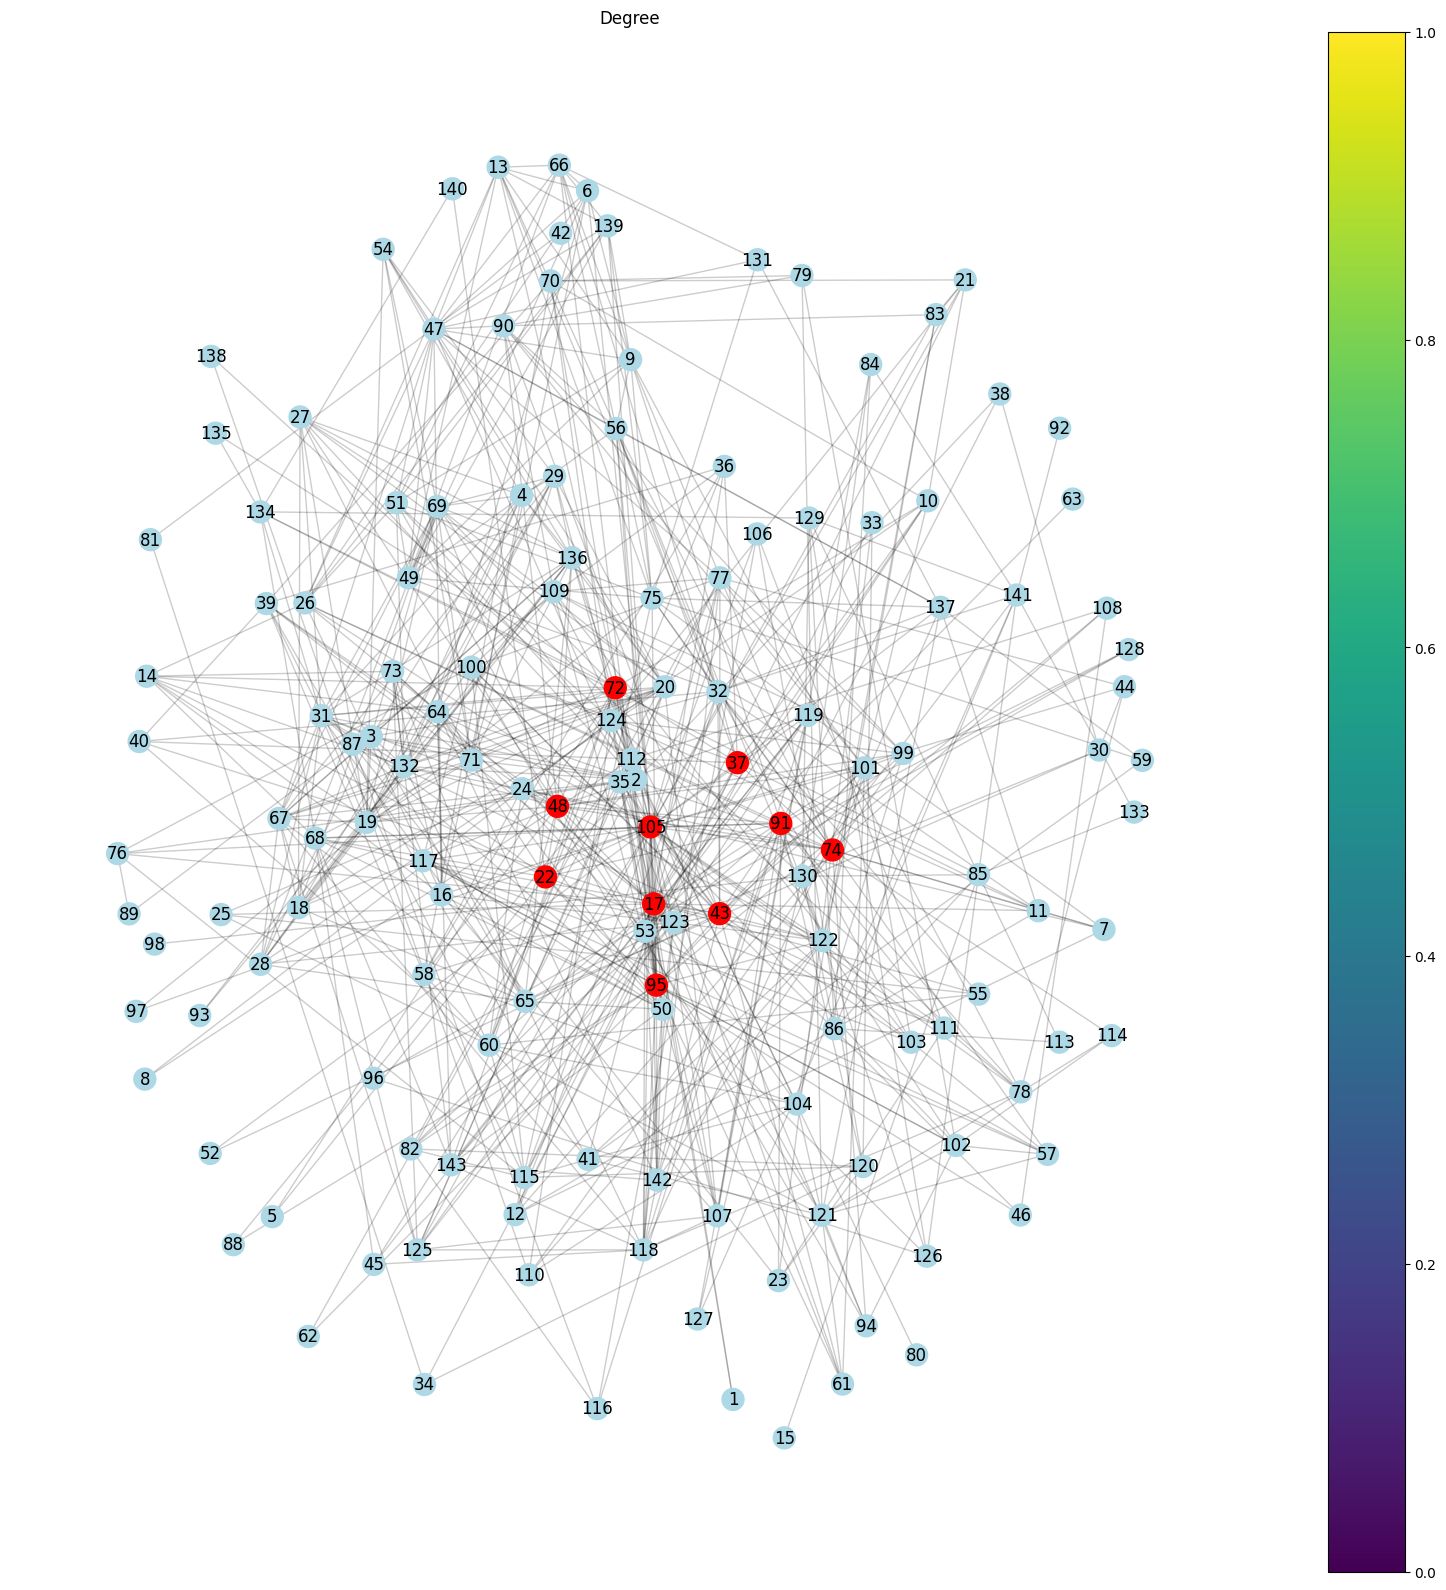

In [25]:
draw_net(G, pos, nx.closeness_centrality(G), 'Degree',close_cen_10)

In [26]:
degree = nx.degree_centrality(G)
deg_cen = [(k, v) for k, v in sorted(degree.items(), key=lambda item: -item[1])]
deg_cen_1 = [node for node, _ in deg_cen[:10]]
deg_cen_10 = ['red' if node in deg_cen_1 else 'lightblue' for node in G.nodes()]
deg_cen[0:10]

[(105, 0.29577464788732394),
 (17, 0.2112676056338028),
 (95, 0.1619718309859155),
 (48, 0.14084507042253522),
 (132, 0.13380281690140847),
 (43, 0.13380281690140847),
 (31, 0.1267605633802817),
 (74, 0.1267605633802817),
 (91, 0.1267605633802817),
 (72, 0.11971830985915494)]

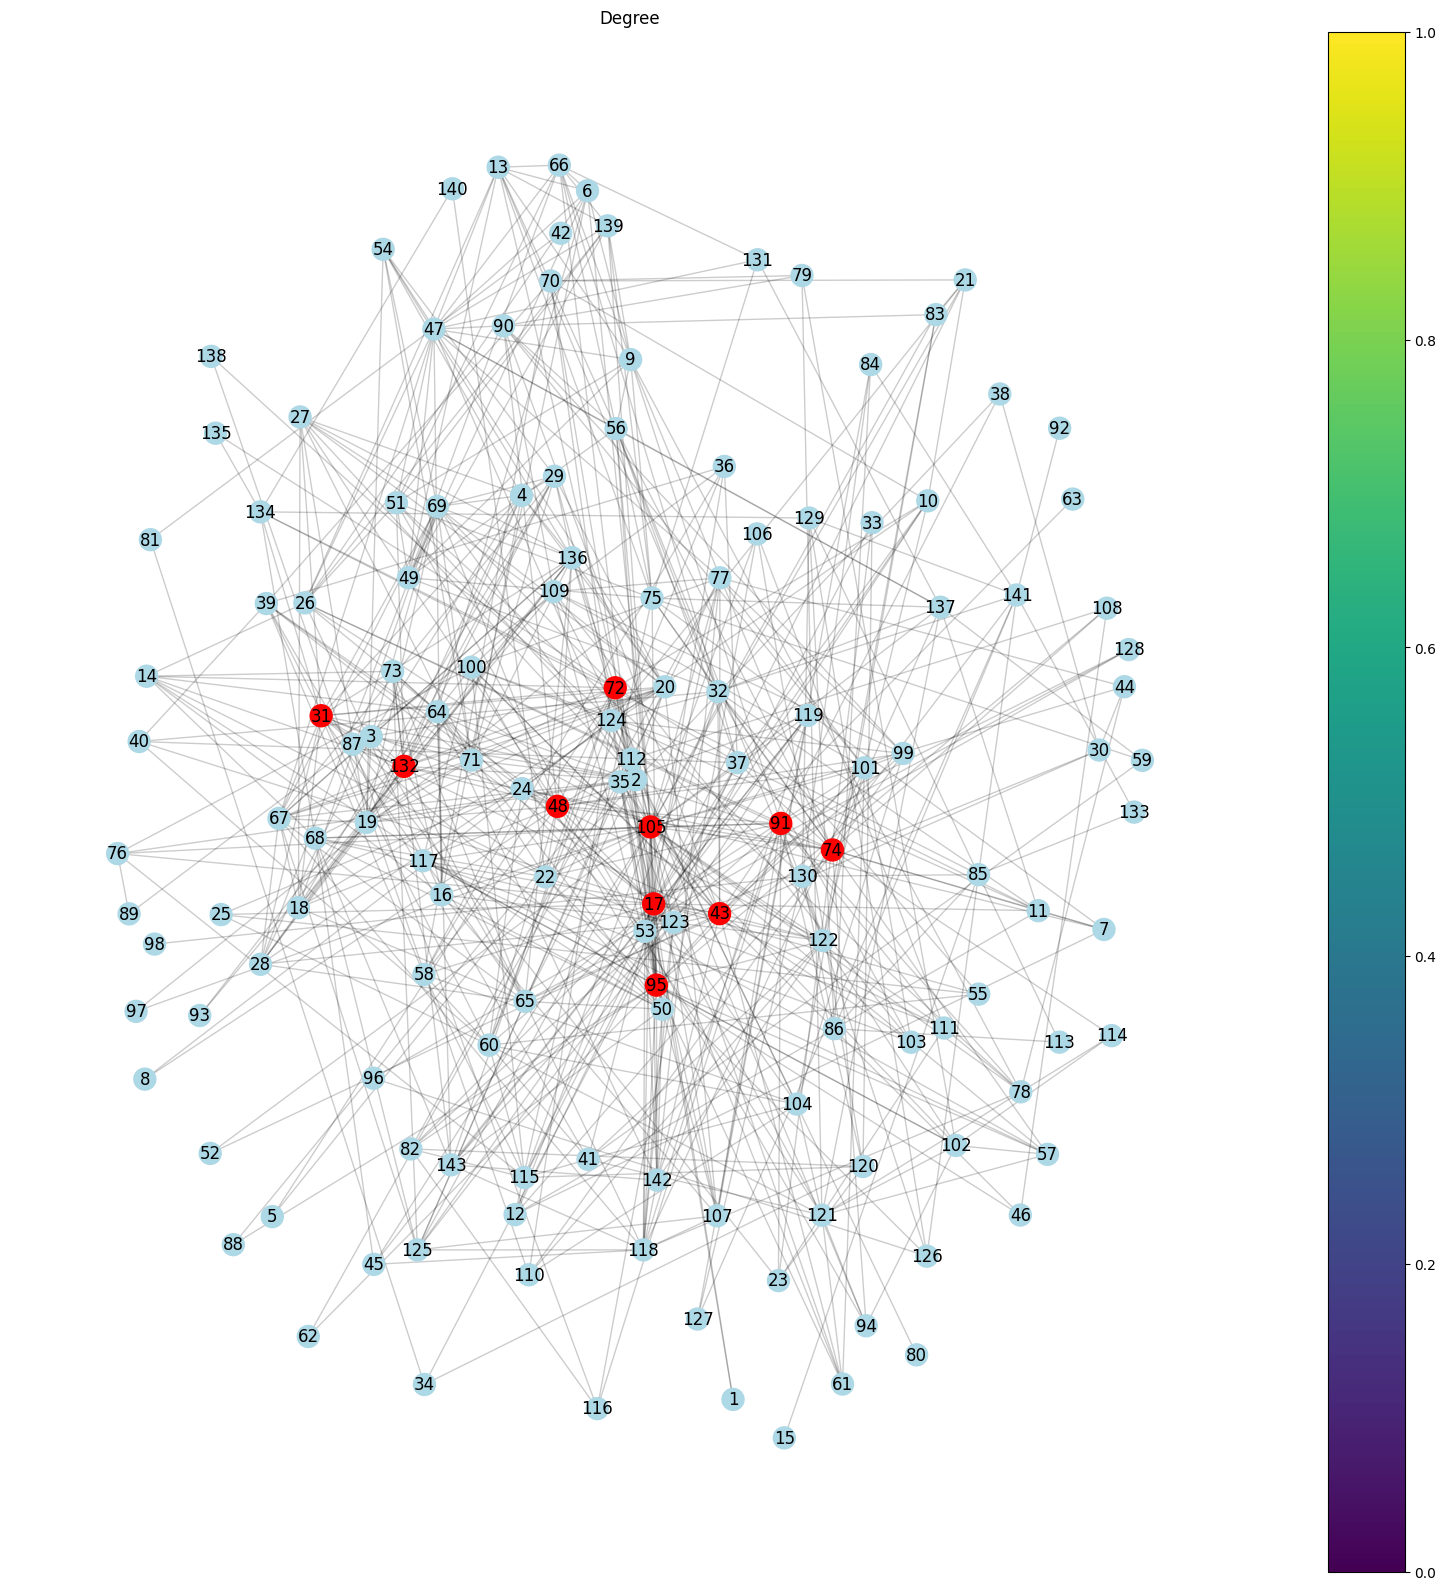

In [27]:
draw_net(G, pos, nx.degree_centrality(G), 'Degree',deg_cen_10)


Paso 4: Crea una red dirigida y analiza con Page rank


In [58]:
G2 = nx.from_pandas_edgelist(Red, source=0, target=1, create_using=nx.DiGraph)
Pos2= nx.spring_layout(G2, k=1)
degree_dict2 = dict(G2.degree())
sizes2 = [10 * v for v in degree_dict2.values()]

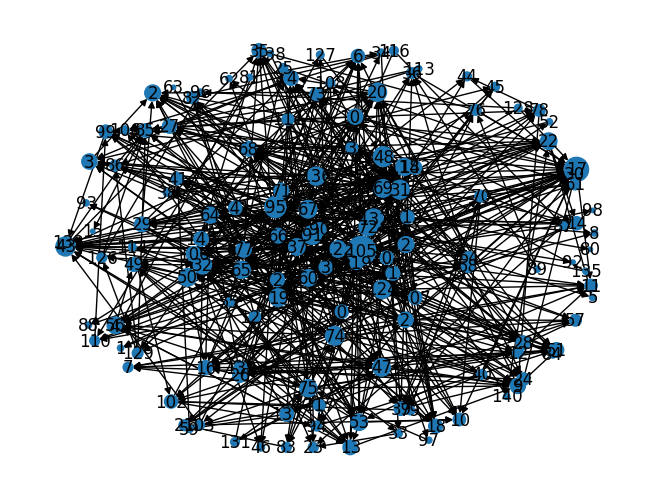

In [59]:
nx.draw(G2, with_labels=True,pos=Pos2,node_size=sizes)

In [48]:
Pagerank = nx.pagerank(G2)
Page_cen = [(k, v) for k, v in sorted(Pagerank.items(), key=lambda item: -item[1])]
Page_cen_1 = [node for node, _ in Page_cen[:10]]
Page_cen_10 = ['red' if node in Page_cen_1 else 'lightblue' for node in G2.nodes()]

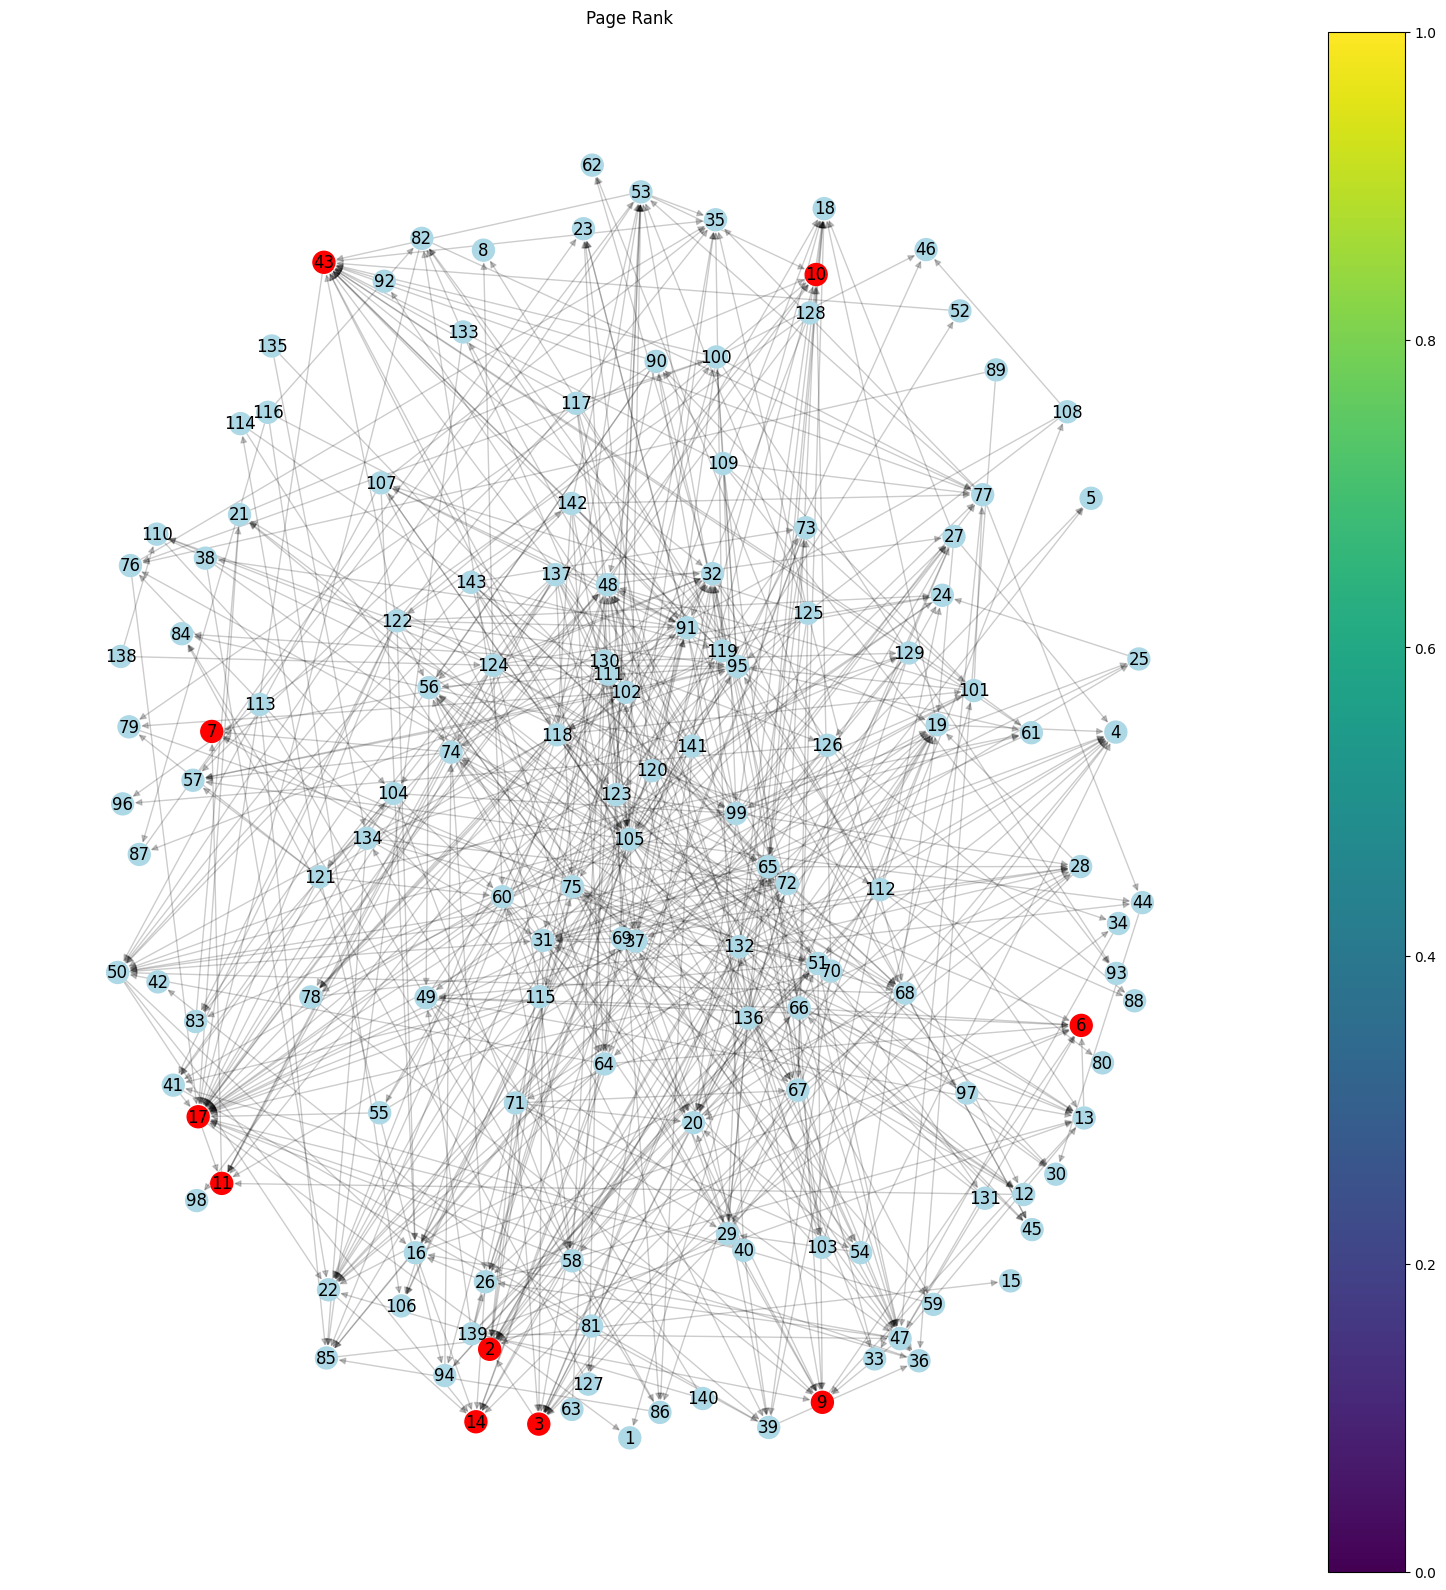

In [50]:
draw_net(G2, Pos2, nx.pagerank(G2), 'Page Rank',Page_cen_10)

In [60]:
max_node = max(Pagerank, key=Pagerank.get)
print("El nodo más importante es:", max_node)

El nodo más importante es: 17


In [53]:
num_nodos = G2.number_of_nodes()
print(num_nodos)

143


In [54]:
num_edges=G2.number_of_edges()
print(num_edges)

623
